<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/Computer%20Science/Artificial%20Intelligence/MNIST/DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.enabled = False
torch.manual_seed(1)

# valriable setting

In [2]:
batch_size_train = 64
batch_size_val = 64
batch_size_test = 1000

# Data load

In [3]:
standard = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5))])

train_data = datasets.MNIST(root='data/', train=True, transform=standard, download=True)
test_data = datasets.MNIST(root='data/', train=False, transform=standard, download=True)

print('training data number : %d' %len(train_data))
print('test data number : %d' %len(test_data))


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!
training data number : 60000
test data number : 10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size_val, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=True)

## Data Check

In [5]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


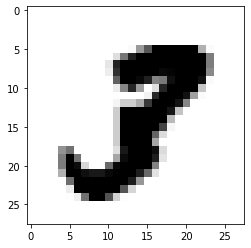

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

# Modeling

In [20]:
input_size = 784        # 28 x 28
output_size = 10        # 0 ~ 9

model = nn.Sequential(
    nn.Linear(input_size, 300),
    nn.LeakyReLU(),
    nn.Linear(300, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 64),
    nn.LeakyReLU(),
    nn.Linear(64, output_size),
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=300, out_features=100, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=100, out_features=64, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=64, out_features=10, bias=True)
)


## Select Loss function

In [24]:
criteria = nn.CrossEntropyLoss()

images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

loss = criteria(model(images), labels)

tensor(2.2675, grad_fn=<NllLossBackward>)

## Optimizer Setting

In [25]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

## Training

In [26]:
epochs = 100

for epoch in range(epochs):
  
  for images, labels in train_loader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()

    output = model(images)
    loss = criteria(output, labels)

    loss.backward()
    optimizer.step()
  
  if epoch % 10 == 0:
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 0.27096524834632874
epoch 10, loss 0.003076807828620076
epoch 20, loss 0.00175370869692415
epoch 30, loss 2.1315021513146348e-05
epoch 40, loss 0.00015514848928432912
epoch 50, loss 8.828320460452233e-06
epoch 60, loss 1.6391263102377707e-07
epoch 70, loss 8.727407839614898e-05
epoch 80, loss 3.1153867894317955e-05
epoch 90, loss 0.000102769467048347


# Classification

In [36]:
corrects = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        
        _, preds = torch.max(output, 1)
        corrects += torch.sum(preds == labels)

acc = corrects / 10000 * 100
print("Accuracy : %.4f" %acc)

Accuracy : 98.0800
